In [1]:
from epyt import epanet

In [2]:
d=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



In [3]:
d.deleteControls()

In [11]:
tankID='2'

In [20]:
tankIndex=d.getNodeIndex(tankID)

pumpIndex=d.getLinkIndex('9')

In [21]:
tankElevation=d.getNodeElevations(tankIndex)

In [22]:
tankElevation

850.0

In [23]:
d.openHydraulicAnalysis()
d.initializeHydraulicAnalysis()

In [24]:
step=1
i=0
T,P,F,S=[],[],[],[]

In [25]:
Below=110
Above=140
TankHead=[]

In [47]:
while step>0:
    H=d.getNodeHydraulicHead()
    TankHead.append(H[tankIndex-1]-tankElevation)
    if TankHead[i]<Below:
        d.setLinkStatus(pumpIndex,1) # Open pump if tank head is below 110
    if TankHead[i]>Above:
        d.setLinkStatus(pumpIndex,0) # Close pump if water reachers max threshold
    
    i+=1
    t=d.runHydraulicAnalysis()
    T.append(t)
    S.append(d.getLinkStatus(pumpIndex))
    P.append(d.getNodePressure(1))
    F.append(d.getLinkFlows())
    step=d.nextHydraulicAnalysisStep()
d.closeHydraulicAnalysis()
print("ok")
    

ok


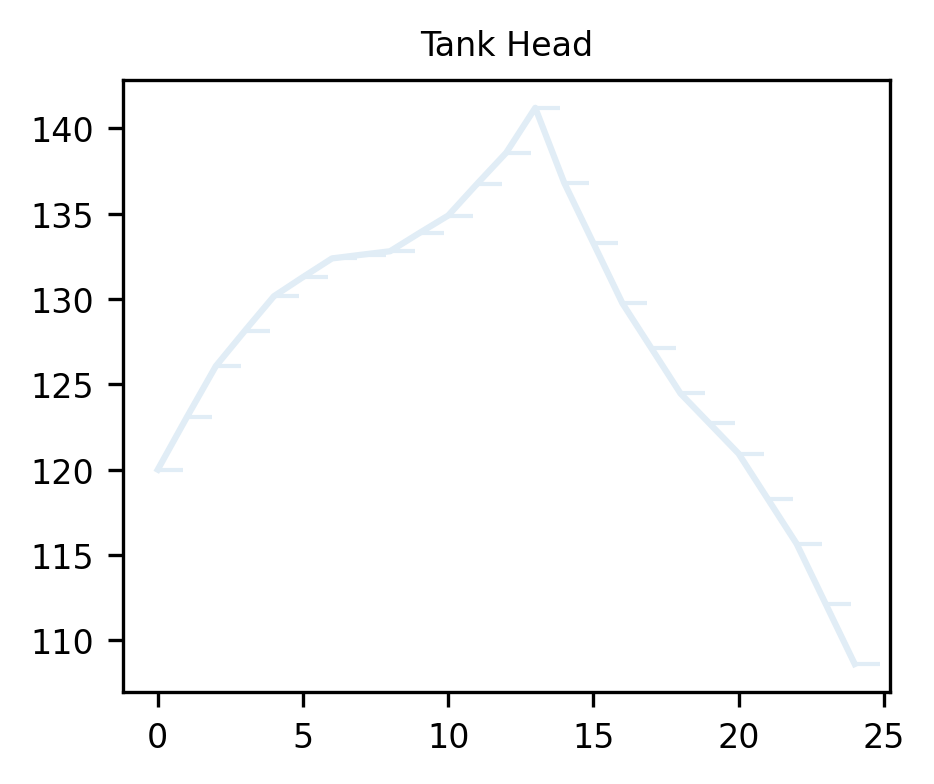

In [48]:
d.plot_ts(Y=TankHead,title='Tank Head',marker=True)

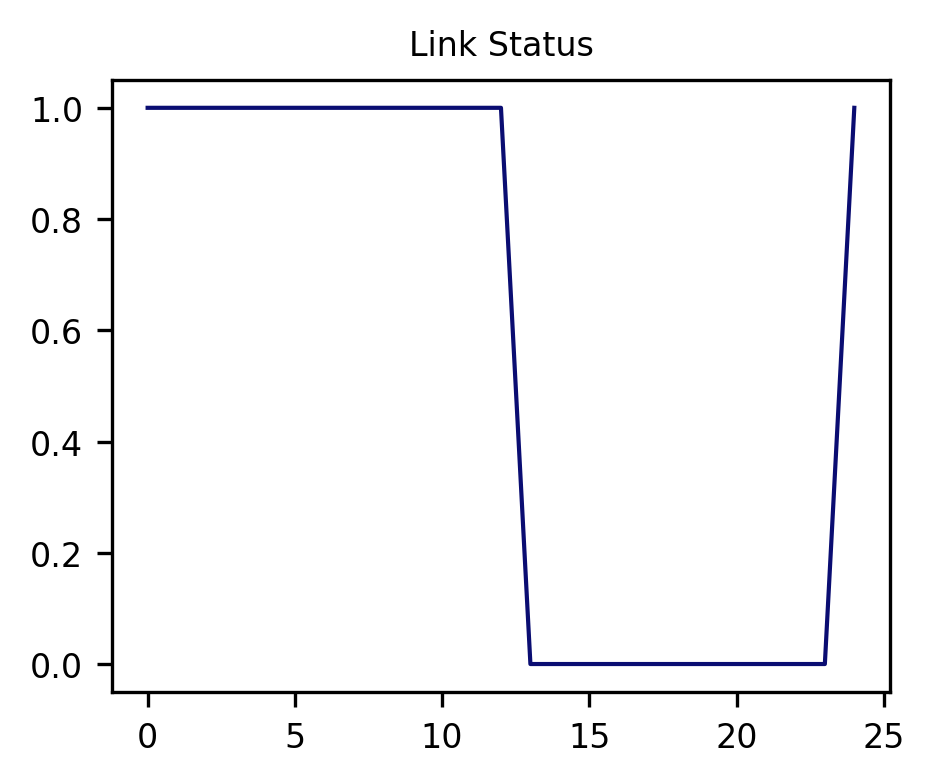

In [49]:
d.plot_ts(Y=S,title='Link Status',marker=False)

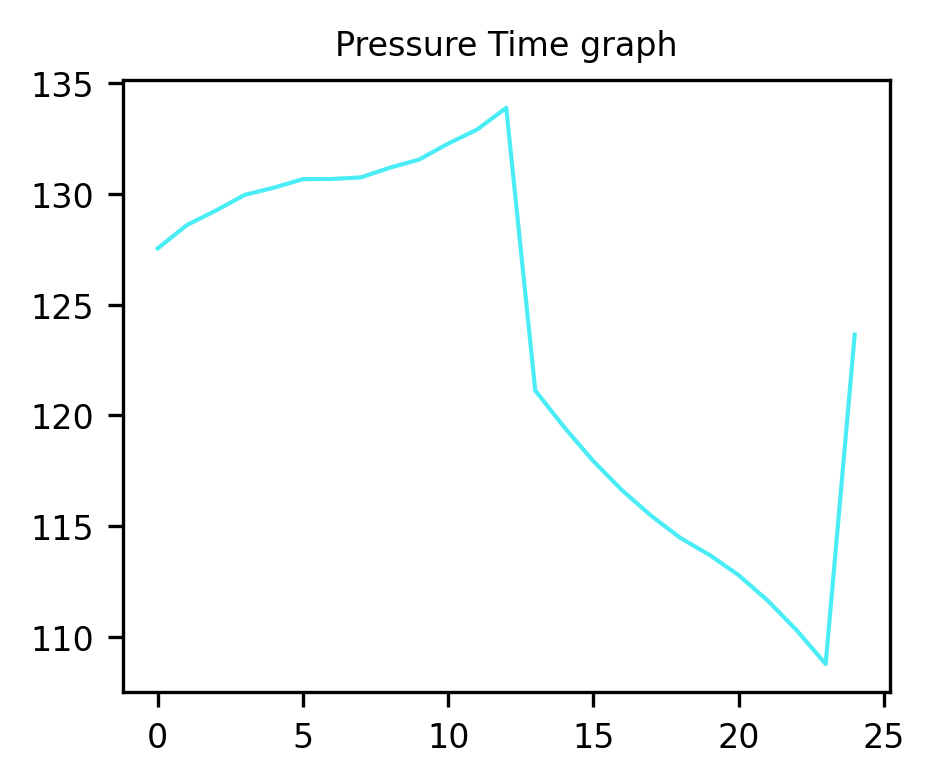

In [50]:
d.plot_ts(Y=P,title='Pressure Time graph',marker=False)

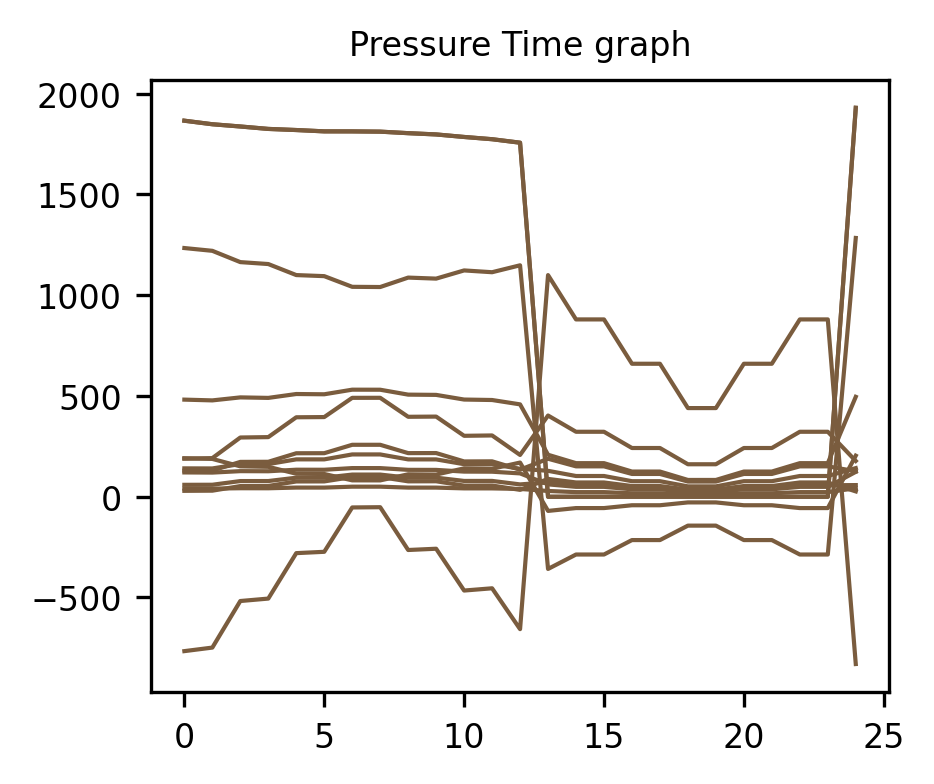

In [51]:
d.plot_ts(Y=F,title='Pressure Time graph',marker=False)

In [52]:
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.



In [53]:
d=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.

